<a href="https://colab.research.google.com/github/trinisaputri/capstone/blob/main/Capstone_Kucing_Random_Forest_Sklearn_3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install flask

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from google.colab import files
from flask import Flask, jsonify, request

In [ ]:
def evaluate_model(model_name, true_labels, predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=1)
    recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=1)
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    print(f'{model_name} Model Evaluation:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

In [ ]:
def plot_confusion_matrix(conf_matrix, classes, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

In [ ]:
uploaded = files.upload()
data = pd.read_csv('Dummy_Sklearn.csv')
print(data.head())

Saving Dummy_Sklearn.csv to Dummy_Sklearn.csv
   Batuk  Bau mulut  Benjolan atau pembengkakan yang tidak hilang  Bersin  \
0      0          0                                             0       0   
1      0          0                                             0       0   
2      0          0                                             0       0   
3      0          0                                             0       0   
4      0          0                                             0       0   

   Borok di Lidah, Gusi, Bibir, atau Hidung  Buang Air kecil berlebih  \
0                                         0                         0   
1                                         0                         0   
2                                         0                         0   
3                                         0                         0   
4                                         0                         0   

   Buang Air Besar Berlebih  Bulu rontok  Darah dala

In [ ]:
columns = data.columns
print(columns)

Index(['Batuk', 'Bau mulut', 'Benjolan atau pembengkakan yang tidak hilang',
       'Bersin', 'Borok di Lidah, Gusi, Bibir, atau Hidung',
       'Buang Air kecil berlebih', 'Buang Air Besar Berlebih', 'Bulu rontok',
       'Darah dalam urin', 'Dehidrasi', 'Demam', 'Diare', 'Gusi Bengkak',
       'Gusi Merah atau Keunguan', 'Gusi Pucat', 'Infeksi saluran kemih',
       'Infeksi Kulit', 'Infeksi telinga', 'Infertilitas', 'Kejang-kejang',
       'Kesulitan buang air besar', 'Kesulitan Bernafas', 'Kemerahan',
       'Kulit bersisik atau menglupas', 'Kulit Warna Kuning', 'Konjugtivitas',
       'Kulit berkerak', 'Kurang Nafsu Makan', 'Lecet', 'Lemes atau Lemah',
       'Luka yang tidak sembuh', 'Mata Berair', 'Muntah', 'Minum air lebih',
       'Pembengkakan', 'Pembengkakan Kelenjar Getah Bening',
       'Penurunan Berat Badan', 'Perut Kembung atau Membucit',
       'Perut Sensitif', 'Pupil mata mengecil', 'Tremor atau Trauma', 'Radang',
       'Sulit Berjalan', 'Sering Menggaruk', 'Diagnos

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.15, random_state=125)
# Random Forest Classifier
model = RandomForestClassifier(n_estimators=10, random_state=125)
model.fit(X_train, y_train_encoded)

# Evaluate model
predictions = model.predict(X_test)
evaluate_model("Decision Tree", y_test_encoded, predictions)

Decision Tree Model Evaluation:
Accuracy: 0.8947368421052632
Precision: 0.9824561403508772
Recall: 0.8947368421052632
F1 Score: 0.8991228070175438


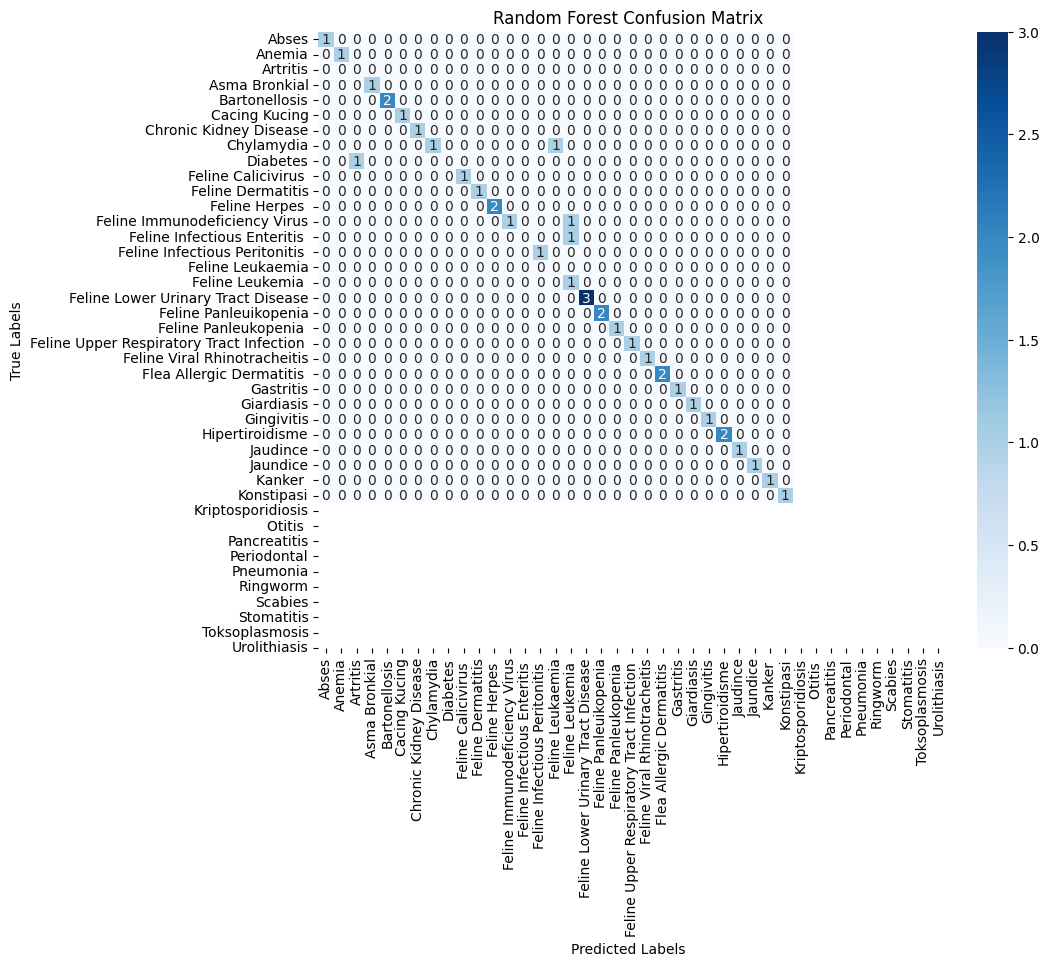

In [ ]:
conf_mat_decision_tree = confusion_matrix(y_test_encoded, predictions)
plot_confusion_matrix(conf_mat_decision_tree, label_encoder.classes_, "Random Forest Confusion Matrix")

In [ ]:
joblib.dump(model, 'model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [ ]:
app = Flask(__name__)

In [ ]:
loaded_model = joblib.load('model.pkl')
files.download('model.pkl')
loaded_label_encoder = joblib.load('label_encoder.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get JSON data dari request
        data = request.get_json()

        # Transformasi ke DataFrame
        input_data = pd.DataFrame(data)

        # bikin prediksi pake loaded model
        predictions = loaded_model.predict(input_data)

        # Decode predictions pake label encoder
        decoded_predictions = loaded_label_encoder.inverse_transform(predictions)

        # Return predictions as JSON
        return jsonify({'predictions': list(decoded_predictions)})
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
# Save Model as H5
joblib.dump(model, 'decision_tree_model.h5')
files.download('decision_tree_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>